In [10]:
from fastai import *
from fastai.vision import *

import matplotlib.pyplot as plt
import matplotlib.image as imag
import matplotlib.patches as patches

from pathlib import Path
import os

%reload_ext autoreload
%autoreload 2 
%matplotlib inline

## Reading image files

In [11]:
path = Path("/home/mohanned/Downloads/coding/practice/flowers"); path

PosixPath('/home/mohanned/Downloads/coding/practice/flowers')

In [15]:
ospath = 
for dirname in path.iterdir():
    directory_path = os.path.join(path, dirname) 
    print(directory_path)
    print(path, "\n")
    
    for i, fname in enumerate(directory_path):
        print(i, directory_path)

/home/mohanned/Downloads/coding/practice/flowers/sunflower
/home/mohanned/Downloads/coding/practice/flowers 

/home/mohanned/Downloads/coding/practice/flowers/tulip
/home/mohanned/Downloads/coding/practice/flowers 

/home/mohanned/Downloads/coding/practice/flowers/rose
/home/mohanned/Downloads/coding/practice/flowers 

/home/mohanned/Downloads/coding/practice/flowers/dandelion
/home/mohanned/Downloads/coding/practice/flowers 

/home/mohanned/Downloads/coding/practice/flowers/daisy
/home/mohanned/Downloads/coding/practice/flowers 



In [ ]:
# rename the image files into their category names  with an index

for dirname in path.iterdir():
    
    directory_path = os.path.join(path, dirname) 
    
    if os.path.isdir(directory_path):
    
        for i, filename in enumerate(os.listdir(directory_path)):
            os.rename(directory_path + "/" + filename, directory_path + "/" + (dirname +"_"+ str(i)) + ".jpg")

In [8]:
# rename the image files into their category names  with an index

for dirname in path.iterdir():
    
    directory_path = os.path.join(path, dirname) 
    
    if os.path.isdir(directory_path):
    
        for i, filename in enumerate(os.listdir(directory_path)):
            os.rename(directory_path + "/" + filename, directory_path + "/" + (dirname +"_"+ str(i)) + ".jpg")

0 /home/mohanned/Downloads/coding/practice/flowers/sunflower/15683877266_42e0fe3782_n.jpg
0 /home/mohanned/Downloads/coding/practice/flowers/tulip/7064778965_ddcc6ee9f2.jpg
0 /home/mohanned/Downloads/coding/practice/flowers/rose/12434194695_a7c4e73c6b_n.jpg
0 /home/mohanned/Downloads/coding/practice/flowers/dandelion/34727715205_62c9c1ac44_n.jpg
0 /home/mohanned/Downloads/coding/practice/flowers/daisy/3704306975_75b74497d8.jpg


#### Retrieve all the file names and store them in a list called "fnames"

In [3]:
fnames = []

for i in path.iterdir():
    
    for o in i.iterdir():
        fnames.append(o)


In [4]:
fnames[2000:2003]

[PosixPath('/home/mohanned/Downloads/coding/practice/flowers/rose/5001855689_e07486c44d_n.jpg'),
 PosixPath('/home/mohanned/Downloads/coding/practice/flowers/rose/6280787884_141cd7b382_n.jpg'),
 PosixPath('/home/mohanned/Downloads/coding/practice/flowers/rose/12238827553_cf427bfd51_n.jpg')]

#### create the labels for all of the images using their filename

In [5]:
def labeling(x):
    
    if "sunflower" in str(x):
        return "sunflower"
    
    elif "tulip" in str(x):
        return "tulip"

    elif "rose" in str(x):
        return "rose"

    elif "dandelion" in str(x):
        return "dandelion"

    elif "daisy" in str(x):
        return "daisy"


#### Creating the transformer for the image augumentation which will include (vertical flipping, rotating 25 degree at maximum, croping and zooming the image)

In [6]:
tfms = get_transforms(flip_vert = True, max_rotate = 25)
batch_size = 10

#### Creating a data object which creates a training and testing datasets, and labels the images
Notice: 
* The image is resized to 224
* The batch size is for the dataloader is 10
* the validation set occupies 20% of the dataset

In [7]:
data = ImageDataBunch.from_name_func(path, fnames, label_func = labeling, ds_tfms = tfms, 
                                     valid_pct = 0.2, bs = batch_size, size = 224).normalize()

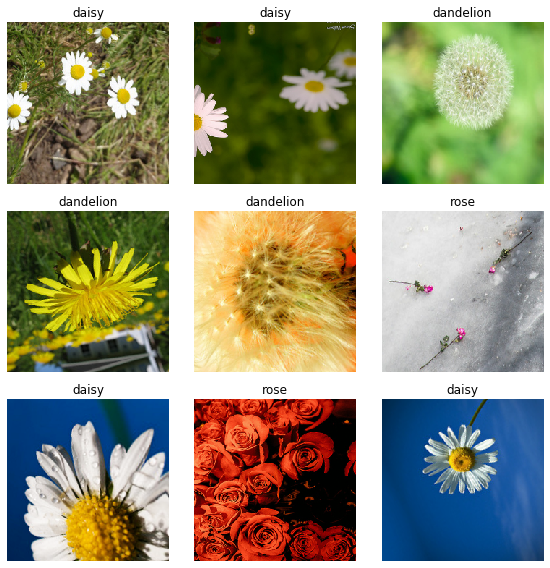

In [8]:
data.show_batch(rows = 3, figsize = (8,8))

In [9]:
data

ImageDataBunch;

Train: LabelList (3459 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sunflower,sunflower,sunflower,sunflower,sunflower
Path: /home/mohanned/Downloads/coding/practice/flowers;

Valid: LabelList (864 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rose,sunflower,sunflower,daisy,sunflower
Path: /home/mohanned/Downloads/coding/practice/flowers;

Test: None

As you can see we have have five classes. Namely: 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip'

In [10]:
print(len(data.classes))
print(data.classes)

5
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


# Training with  ResNet50:

I will train the model using a convolutional neural network. ResNet-50 is a convolutional neural network that is 50 layers deep. I will load a pretrained version of the network trained on more than a million images. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

##### An object "learn" is defined which contains the architecture of the model.
Notice:
* you have to specify the data on which it will train
* I've passed metrics That I want to see while training the model which are "error_rate" and accuracy

In [11]:
learn = cnn_learner(data, models.resnet50, metrics = [error_rate, accuracy])

As you can see below the learn object the datasets which the model will use to learn and the model architecture

In [12]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (3459 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sunflower,sunflower,sunflower,sunflower,sunflower
Path: /home/mohanned/Downloads/coding/practice/flowers;

Valid: LabelList (864 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sunflower,dandelion,sunflower,sunflower,rose
Path: /home/mohanned/Downloads/coding/practice/flowers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1

#### Below we are only training the last layer which predicts the classes

In [13]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.924766,0.573114,0.153935,0.846065,21:32
1,0.782919,0.363520,0.128472,0.871528,22:52
2,0.689836,0.329668,0.126157,0.873843,27:02
3,0.407665,0.266003,0.096065,0.903935,21:35
4,0.362911,0.240627,0.089120,0.910880,21:31
5,0.376175,0.234898,0.089120,0.910880,23:37


In [14]:
learn.save("model-1")

#### The "unfreeze" function allows me to train all of the parameters in the model

In [31]:
learn.unfreeze()

In [35]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


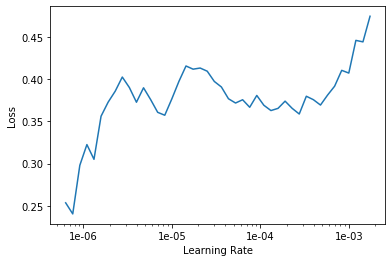

In [36]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(2, max_lr= slice(5e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.319159,0.216013,0.079861,0.920139,34:24
1,0.333299,0.211524,0.076389,0.923611,33:19


In [43]:
learn.save("model-2")

In [13]:
learn.load("model-2")

Learner(data=ImageDataBunch;

Train: LabelList (3459 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sunflower,sunflower,sunflower,sunflower,sunflower
Path: /home/mohanned/Downloads/coding/practice/flowers;

Valid: LabelList (864 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rose,sunflower,sunflower,daisy,sunflower
Path: /home/mohanned/Downloads/coding/practice/flowers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), b

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(2, max_lr= slice(5e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.386533,0.151464,0.049769,0.950231,29:18
1,0.334687,0.147659,0.054398,0.945602,41:17


## Result
I will visualize which categories the model most confused with one another.


In [44]:
interp = ClassificationInterpretation.from_learner(learn)

#### Below is a display of the top 9 confusions of the model. It shows:
* What the model predicted
* What it should've predicted
* The loss
* The probability of predicting the actual category

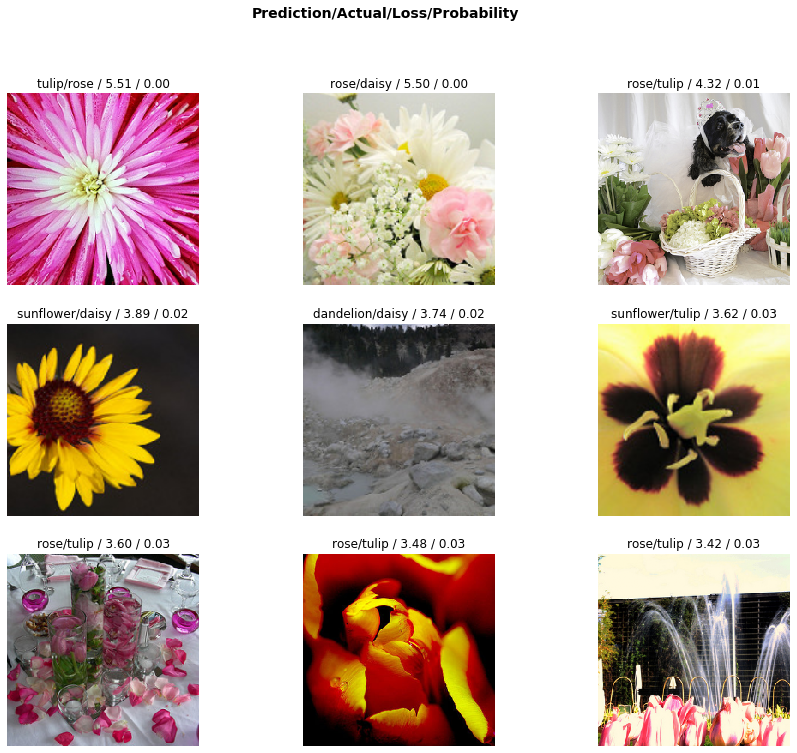

In [45]:
interp.plot_top_losses(9, figsize=(15, 12))

#### Below is an illustration of the confusion among categories

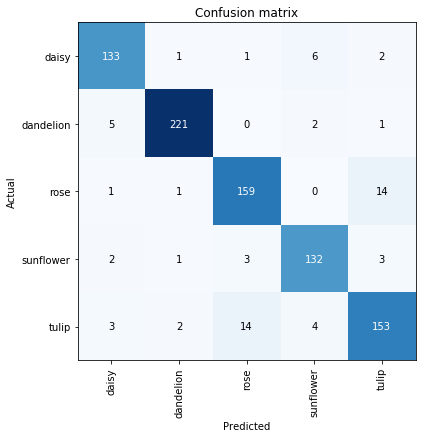

In [46]:
interp.plot_confusion_matrix(figsize = (6, 6))

In [47]:
#### Below is an illustration of the categories that the model is confused about the most

In [49]:
interp.most_confused()[:4]

[('rose', 'tulip', 14),
 ('tulip', 'rose', 14),
 ('daisy', 'sunflower', 6),
 ('dandelion', 'daisy', 5)]